# Learning and Decision Making

## Laboratory 5: Reinforcement learning

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. The key world domain

Consider once again the gridworld domain from Lab 2 and which you modeled using a Markov decision process.

<img src="maze.png" width="200px">

Recall that:

* At each step, the agent may move in any of the four directions -- up, down, left and right.

* Movement across a _grey_ cell division succeeds with a $0.8$ probability and fails with a $0.2$ probability. 

* Movements across colored cell divisions (blue or red) succeed with a $0.8$ probability _but only if the agent has the corresponding colored key_. Otherwise, they fail with probability $1$. 

* When the movement fails, the agent remains in the same cell. 

* To get a colored key, the agent simply needs to stand in the corresponding cell. 

* The goal of the agent is to reach the cell marked with **"G"**. 

Throughout the lab, use $\gamma=0.99$. As seen in Lab 2, this problem can be modeled as a Markov decision problem $(\mathcal{X},\mathcal{A},\{\mathbf{P_a}\},c,\gamma\}$ as follows.

In [1]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# States
X = ['1BR', '2', '2R', '2BR', '3', '3R', '3BR', '4', '4R', '4BR', '5', '5R', '5BR', '6BR', '7R', '7BR']

nX = len(X)

# Actions
A = ['U', 'D', 'L', 'R']

nA = len(A)

# Transition probabilities for the hare
U = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

D = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

L = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

R = np.array([[0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

P = [U, D, L, R]

# Cost function
             
c = np.array([[1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [0.0, 0.0, 0.0, 0.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0]])

gamma = 0.99

---

#### Activity 1.        

Compute the optimal $Q$-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [2]:
def Q_value_iteration():
    MIN_ERR = 1e-8
    J = np.zeros((nX, 1))
    err = 1

    # Based on slide 62 of lec8.pdf:
    while err > MIN_ERR:
        Qs = [c[:, [i]] + gamma * P[i] @ J for i in range(nA)]
        Jnew = np.min(Qs, axis=0)
        err = np.linalg.norm(Jnew - J)
        J = Jnew
    return np.hstack(Qs)

Q1 = Q_value_iteration()
print(Q1)

[[ 5.84607096  5.84607096  5.84607096  4.89502117]
 [11.57144785 10.67823015 11.57144785 12.45352816]
 [ 7.0200601   7.9475408   6.08086879  7.9475408 ]
 [ 4.65725873  3.69420073  5.60830851  3.69420073]
 [12.67404824 11.79196792 11.79196792 12.67404824]
 [ 8.17941097  9.09532707  7.25193028  8.17941097]
 [ 3.45343623  2.47821842  4.41649423  3.45343623]
 [11.34814342  9.55043002 10.45492572 11.34814342]
 [ 7.25193028  9.09532707  8.17941097  9.09532707]
 [ 4.41649423  4.41649423  3.45343623  2.47821842]
 [12.45352816 11.57144785 10.67823015 11.57144785]
 [ 8.40839     9.3243061   8.40839     9.3243061 ]
 [ 3.20963178  2.23441397  3.20963178  1.24688279]
 [ 0.          0.          0.98753117  0.        ]
 [ 8.40839     9.3243061   9.3243061   9.3243061 ]
 [ 3.69420073  4.65725873  4.65725873  4.65725873]]


---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $x$, selects a random action using the $\epsilon$-greedy policy obtained from $Q$ for state $x$. Your function should receive an optional parameter, corresponding to $\epsilon$, with default value of 0.1. 

**Note:** In the case of two actions with the same value, your $\epsilon$-greedy policy should randomize between the two.

---

In [3]:
from collections import Counter

def epsilon_greedy(Q, x, epsilon=0.1):
    if np.random.choice([0, 1], p=[epsilon, 1-epsilon]):
        return np.random.choice(np.where(Q[x] == np.min(Q[x]))[0])
    else:
        return np.random.choice(nA)

def test_epsilon(X, epsilon):
    N_TESTS = 1000
    results = dict(Counter([epsilon_greedy(Q1, X, epsilon) for i in range(N_TESTS)]))
    for key in sorted(results):
        print("\t%d: %g%%" % (key, results[key] / N_TESTS * 100))

def test():
    X = 3
    print("Q for state %d:\n\t%s" % (X, str(Q1[X])))
    print("Always exploit:")
    test_epsilon(X, 0)
    print("50%/50%:")
    test_epsilon(X, 0.5)
    print("Always explore:")
    test_epsilon(X, 1)

test()

Q for state 3:
	[4.65725873 3.69420073 5.60830851 3.69420073]
Always exploit:
	1: 49.8%
	3: 50.2%
50%/50%:
	0: 12%
	1: 39.6%
	2: 11.1%
	3: 37.3%
Always explore:
	0: 23.9%
	1: 23.8%
	2: 26.7%
	3: 25.6%


### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for $5,000$ iterations. Initialize each transition probability matrix as the identity and the cost function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* The state and action, you will then compute the cost and generate the next state; 
* With this transition information (state, action, cost, next-state), you can now perform an update. 
* When updating the components $(x,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(x,a)+1},$$

where $N_t(x,a)$ is the number of visits to the pair $(x,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the boat reaches the goal cell, make one further step, the corresponding update, and then reset the position of the vehicle to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every iteration of your method, where $Q^*$ is the optimal $Q$-function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

[[ 5.88863145  5.89087448  5.88863145  4.94220741]
 [11.6483001  10.76234905 11.6483001  12.41368056]
 [ 7.07888536  8.04507785  6.14307737  7.93344736]
 [ 4.66766908  3.70828586  5.65963551  3.92624665]
 [12.74336974 11.85627772 11.96060147 12.95914528]
 [ 7.89889184  7.73706748  7.39723152  8.14435943]
 [ 3.80941199  2.72729775  3.4552495   3.80941199]
 [11.4412514   9.62207672 10.55790588 11.3987379 ]
 [ 7.32895168  9.21060284  8.27359742  9.01230461]
 [ 4.27302518  4.85246177  3.47603761  2.50115506]
 [12.57317568 11.63086868 10.73001036 11.63003047]
 [ 8.63759298  9.08115319  8.31184401  9.12383665]
 [ 3.50968894  2.23910617  3.37862062  1.2425307 ]
 [ 0.          0.          1.01801614  0.        ]
 [ 8.5139862   9.43102357  9.46342974  9.43654308]
 [ 4.01757566  4.42069701  4.23582445  4.61662171]]


<IPython.core.display.Javascript object>


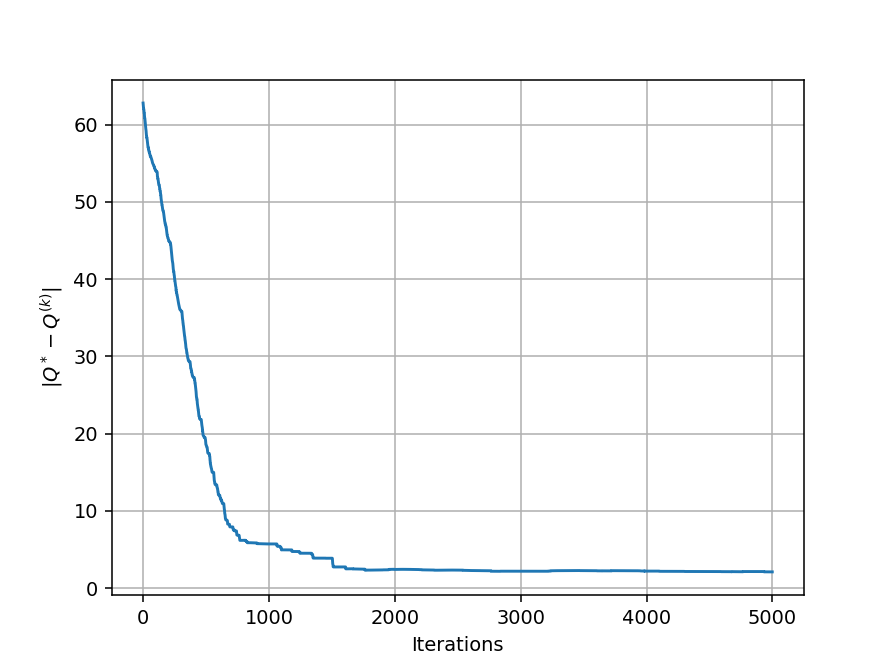

In [4]:
N_ITERATIONS = 5000
GOAL = 13

P3 = [np.eye(nX) for a in range(nA)]
c3 = np.zeros((nX, nA))
Q3 = np.zeros((nX, nA))
N3 = np.zeros((nX, nA))

def P_t1(y, x_t, a_t, x_t1, alpha):
    P3[a_t][x_t, y] = P3[a_t][x_t, y] + alpha * (int(x_t1 == y) - P3[a_t][x_t, y])
    
    # Doesn't seem to be necessary for np.random.choice
    # Also some lines get zeroed out? Would that mean a uniform distribution?
    #s = np.sum(P3[a_t][x_t])
    #if s != 0:
    #    P3[a_t][x_t] /= s
    
    return P3[a_t][x_t, y]

def c_t1(x_t, a_t, c_t, alpha):
    c3[x_t, a_t] = c3[x_t, a_t] + alpha * (c_t - c3[x_t, a_t])
    return c3[x_t, a_t]

def step_size(x_t, a_t):
    return 1/(N3[x_t, a_t] + 1)

# Slide 4 of lec21.pdf
def Q_t1(x_t, a_t, c_t, x_t1):
    alpha = step_size(x_t, a_t)
    N3[x_t, a_t] += 1
    result = c_t1(x_t, a_t, c_t, alpha)
    for y in range(nX):
        result += gamma * P_t1(y, x_t, a_t, x_t1, alpha) * np.min(Q3[y])
    return result

def reset():
    return np.random.choice((1, 4, 7, 10)) # The 4 states without a key

def plot_norm_Qstar_Q(norms):
    fig = plt.figure()
    plt.gca().grid(True)
    plt.plot(np.arange(len(norms)), norms)
    plt.xlabel("Iterations")
    plt.ylabel("$\|Q^*-Q^{(k)}\|$")
    plt.show()

def simulate(Q, Q_update_function, use_a_t1 = False):
    norms = []
    x_t = reset()
    a_t = epsilon_greedy(Q, x_t)
    
    for i in range(N_ITERATIONS):
        c_t = c[x_t, a_t]
        x_t1 = np.random.choice(nX, p=P[a_t][x_t])
        a_t1 = epsilon_greedy(Q, x_t1)
        
        if use_a_t1:
            Q[x_t, a_t] = Q_update_function(x_t, a_t, c_t, x_t1, a_t1)
        else:
            Q[x_t, a_t] = Q_update_function(x_t, a_t, c_t, x_t1)
        
        # If x_t1 is the GOAL, the extra iteration will still run as specified, as x_t isn't the GOAL
        if x_t == GOAL:
            x_t = reset()
            a_t = epsilon_greedy(Q, x_t)
        else:
            x_t = x_t1
            a_t = a_t1
        
        norms.append(np.linalg.norm(Q1 - Q))
    return norms

norms3 = simulate(Q3, Q_t1)
print(Q3)
plot_norm_Qstar_Q(norms3)

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with that of the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the $Q$-learning algorithm with a learning rate $\alpha=0.3$.

---

[[ 5.41613132  5.52333469  5.40329775  4.18780062]
 [11.29867245 10.67263555 11.04458522 11.83418933]
 [ 6.82402436  7.17725043  5.39485721  7.28556633]
 [ 4.37615556  3.21980085  5.42185845  4.14092675]
 [11.64666639 11.76246926 11.39641963 11.96084707]
 [ 6.92380343  7.10996323  6.75170642  6.99229814]
 [ 3.5598058   2.33044854  3.70487195  3.37773358]
 [10.83454931  9.19753379 10.13352511 10.45882456]
 [ 6.7230063   8.56337519  7.6879565   7.90503164]
 [ 4.01069707  3.94688959  3.34850495  2.23069591]
 [11.5064048  11.05469945 10.22973185 11.13903085]
 [ 7.27955739  7.32719271  7.18767412  7.30123166]
 [ 2.83589307  2.14931095  2.89875604  1.01210033]
 [ 0.          0.          0.58454267  0.        ]
 [ 8.03270394  8.92785331  9.07605997  8.93308917]
 [ 3.5175961   3.66859852  3.70937072  3.78423461]]


<IPython.core.display.Javascript object>


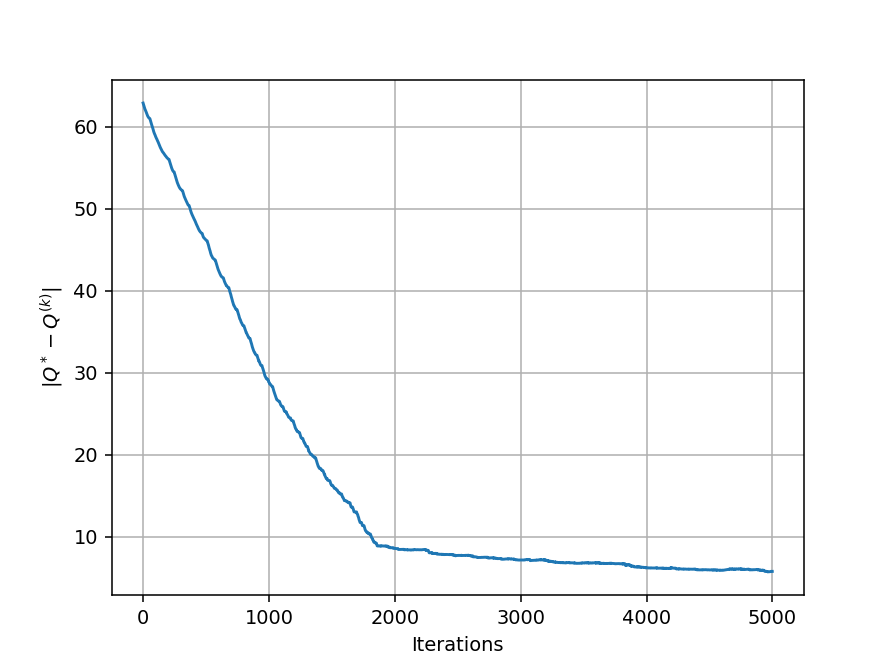

In [5]:
Q4 = np.zeros((nX, nA))

# Slide 15 of lec21.pdf
def Q_learning_update(x_t, a_t, c_t, x_t1, alpha = 0.3):
    return Q4[x_t, a_t] + alpha * (c_t + gamma * np.min(Q4[x_t1]) - Q4[x_t, a_t])

norms4 = simulate(Q4, Q_learning_update)
print(Q4)
plot_norm_Qstar_Q(norms4)

---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

[[ 6.29565226  6.58540384  6.38054238  5.72832251]
 [12.04936274 11.13853318 12.00874808 12.27195417]
 [ 7.65830687  8.69294359  6.51841678  8.16607526]
 [ 5.29644489  5.1124676   5.4010723   4.74607593]
 [12.25376598 12.40829922 12.37145435 12.26706944]
 [ 8.22160817  8.18591665  8.12100339  8.2736211 ]
 [ 4.25353827  2.97896625  4.47082541  4.17932757]
 [11.84733889 10.18625848 11.23059782 11.78426447]
 [ 7.44435341  9.98927978  9.17215527  9.12352476]
 [ 4.09419919  3.90440686  3.63399173  2.98545373]
 [12.0468472  11.83638197 11.17198489 11.96657524]
 [ 8.60328271  8.77477108  8.48627548  8.89008357]
 [ 3.90889025  2.78138326  3.55030811  1.7780421 ]
 [ 0.73885151  0.7375557   0.94040018  0.69942471]
 [ 8.79991123  9.90451394 10.0841523   9.88201742]
 [ 3.53821907  4.08781327  3.83974629  4.02889165]]


<IPython.core.display.Javascript object>


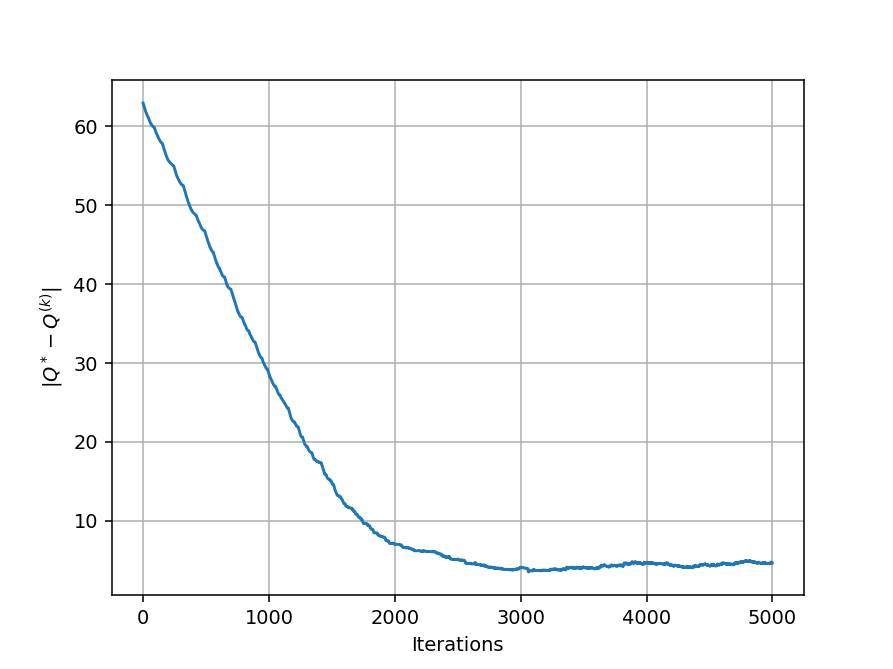

In [6]:
Q5 = np.zeros((nX, nA))

# Slide 32 of lec21.pdf
def SARSA_update(x_t, a_t, c_t, x_t1, a_t1, alpha = 0.3):
    return Q5[x_t, a_t] + alpha * (c_t + gamma * Q5[x_t1, a_t1] - Q5[x_t, a_t])

norms5 = simulate(Q5, SARSA_update, use_a_t1 = True)
print(Q5)
plot_norm_Qstar_Q(norms5)

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

As can be seen from Figure 1, the performance of the model-based learning was the best, usually reaching a smaller $\|Q^*-Q^{(k)}\|$ than the other methods. The second best method was typically SARSA (Figure 3), reaching the second smallest $\|Q^*-Q^{(k)}\|$. Q-learning (Figure 2) had the highest $\|Q^*-Q^{(k)}\|$.

Depending on the explored actions (randomness of the $\epsilon$-greedy policy), Q-learning and SARSA may stabilize between 2000 to 3000 iterations. Model-based learning usually semi-stabilizes at around 800 to 900 iterations, only occasionally decreasing after it.

Between SARSA and Q-Learning (temporal-difference learning; model-free), this result is expected as SARSA is on-policy while Q-learning is off-policy $-$ the latter doesn't follow the optimal policy it's trying to learn thus commits more mistakes and takes more time to learn.

The model-based method performed better than the other two (model-free methods) because it learned approximate transition probabilities and cost function for the given problem, and as such is able to predict future states.